In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("/content/drive/MyDrive/복사본 train1.csv",encoding = "cp949")

In [3]:
df1=df.drop(["이름"],axis=1)
df=df1
df

,집 종류,방 개수,지하철 거리,공항 거리,병원 거리,기차 거리,면적,월세 달러
0,3,3,0.312579,22.646032,11.726966,7.352495,83.61,307
1,1,1,2.486167,13.500583,7.527761,15.877066,83.61,110
2,1,3,1.528794,18.918243,17.135939,10.315737,78.97,369
3,1,3,0.967121,17.749252,16.251937,9.797817,162.58,676
4,3,4,0.834506,4.288189,15.541840,18.179806,218.32,418
...,...,...,...,...,...,...,...,...
8687,3,1,0.005681,7.776390,18.212199,19.535831,46.45,159
8688,3,1,0.007987,12.969368,9.442664,5.039023,81.29,172
8689,1,3,0.203502,17.094466,5.468956,11.109941,148.64,738
8690,1,1,0.248603,20.628700,9.801128,5.679541,41.90,184


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8692 entries, 0 to 8691
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   집 종류    8692 non-null   int64  
 1   방 개수    8692 non-null   int64  
 2   지하철 거리  8692 non-null   float64
 3   공항 거리   8692 non-null   float64
 4   병원 거리   8692 non-null   float64
 5   기차 거리   8692 non-null   float64
 6   면적      8692 non-null   float64
 7   월세 달러   8692 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 543.4 KB


In [5]:
df.isnull().sum()

집 종류      0
방 개수      0
지하철 거리    0
공항 거리     0
병원 거리     0
기차 거리     0
면적        0
월세 달러     0
dtype: int64

In [6]:
df.describe()

,집 종류,방 개수,지하철 거리,공항 거리,병원 거리,기차 거리,면적,월세 달러
count,8692.000000,8692.000000,8692.000000,8692.000000,8692.000000,8692.000000,8692.000000,8692.000000
mean,1.697998,2.119650,0.869998,13.699359,11.373803,11.419991,101.990737,321.376898
std,0.930581,0.900757,1.261337,7.926709,7.500915,7.345131,59.355027,230.962181
min,0.000000,1.000000,0.002892,1.901789,0.669150,0.722023,9.290000,14.000000
25%,1.000000,1.000000,0.459687,11.152285,8.167231,8.075549,55.740000,159.000000
50%,1.000000,2.000000,0.698592,13.139656,10.922441,11.244344,83.610000,258.000000
75%,3.000000,3.000000,1.092694,17.225196,15.548549,15.435535,139.350000,393.000000
max,3.000000,8.000000,65.866623,396.043067,387.016246,390.969378,882.580000,1476.000000


In [7]:
#필요열(변수, feature)만 뽑아서 데이터 만들기
X = df[["방 개수","지하철 거리","공항 거리","병원 거리","기차 거리","면적"]]
Y = df["월세 달러"]

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
#위와 같이 데이터를 훈련 세트와 테스트 세트로 나누었던 이유는 새로운 데이터에 대해 모델이 얼마나 잘 일반화시키는지에 관하여 측정하기 위해서이다.

#model 만들기
model = KNeighborsRegressor()

#교차검증
#교차 검증이란 쉽게 말해 데이터를 여러 번 반복해서 나누고 여러 모델을 학습하여 성능을 평가하는 방법이다. 
#이렇게 하는 이유는 데이터를 학습용/평가용 데이터 세트로 여러 번 나눈 것의 평균적인 성능을 계산하면, 한 번 나누어서 학습하는 것에 비해 일반화된 성능을 얻을 수 있기 때문이다.
score = cross_val_score(model, X_train, Y_train, cv = 10)
print("교차검증 점수 :", score)

교차검증 점수 : [0.74261434 0.76472113 0.71128239 0.77340243 0.74787383 0.71306076
 0.80667381 0.79782332 0.76688748 0.7838882 ]


In [8]:
df.columns

Index(['집 종류', '방 개수', '지하철 거리', '공항 거리', '병원 거리', '기차 거리', '면적', '월세 달러'], dtype='object')

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold

In [11]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 21 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (6,522 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [10]:
import matplotlib.pyplot as plt
plt.rc('font', family="NanumBarunGothic")

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


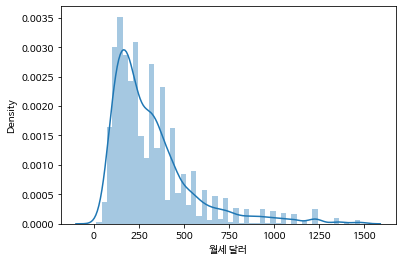

In [11]:
import numpy as np
import seaborn as sns

df["월세달러"] = np.log1p(df["월세 달러"])
sns.distplot(df["월세 달러"])

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

num = ['지하철 거리', '공항 거리', '병원 거리','기차 거리','면적']
cg = ['집 종류','방 개수']

X = df[num+cg]
Y = df["월세 달러"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)


ct = ColumnTransformer([('scling', StandardScaler(),num),('onehot',OneHotEncoder(sparse = False), cg)])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

print(X_train)

[[-0.35173434  1.40638919 -0.39062455 ...  0.          0.
   0.        ]
 [-0.40127669  0.72785946  1.51698094 ...  0.          0.
   0.        ]
 [ 0.39138861  0.80533918  1.18923831 ...  0.          0.
   0.        ]
 ...
 [ 0.15573659 -0.31382844 -0.03470384 ...  0.          0.
   0.        ]
 [-0.47224337  0.17892095 -1.79030324 ...  0.          0.
   0.        ]
 [-0.11439045  0.35175242 -1.59721902 ...  0.          0.
   0.        ]]


선형회귀

In [35]:
from sklearn.linear_model import LinearRegression #LinearRegression : 선형모형
from sklearn.metrics import mean_squared_error
from math import sqrt #루트 - 제곱합이라서 너무커보이니 줄여주려고 루트를 씌워줌

lr= LinearRegression().fit(X_train, Y_train)

Y_pred = lr.predict(X_test)
print("predict value\n", Y_pred)
print("train R2 : {:.3f}".format(lr.score(X_train,Y_train)))

rmse = sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE : {:.3f} ".format(rmse))

predict value
 [143.61742072 192.08554143 487.04738192 ... 385.22072487 466.48917464
 129.98168676]
train R2 : 0.688
RMSE : 206.283 


In [14]:
df

,집 종류,방 개수,지하철 거리,공항 거리,병원 거리,기차 거리,면적,월세 달러,월세달러
0,3,3,0.312579,22.646032,11.726966,7.352495,83.61,307,5.730100
1,1,1,2.486167,13.500583,7.527761,15.877066,83.61,110,4.709530
2,1,3,1.528794,18.918243,17.135939,10.315737,78.97,369,5.913503
3,1,3,0.967121,17.749252,16.251937,9.797817,162.58,676,6.517671
4,3,4,0.834506,4.288189,15.541840,18.179806,218.32,418,6.037871
...,...,...,...,...,...,...,...,...,...
8687,3,1,0.005681,7.776390,18.212199,19.535831,46.45,159,5.075174
8688,3,1,0.007987,12.969368,9.442664,5.039023,81.29,172,5.153292
8689,1,3,0.203502,17.094466,5.468956,11.109941,148.64,738,6.605298
8690,1,1,0.248603,20.628700,9.801128,5.679541,41.90,184,5.220356


knn

In [15]:
import numpy as np

X = df[['지하철 거리', '공항 거리', '병원 거리', '기차 거리', '면적','방 개수','집 종류']]
Y = df["월세 달러"]
Y = np.log1p(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

scaler = StandardScaler().fit(X_train, Y_train)
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors = 9, p=2)
#p : int, default=2
#power parameter for the minkowski metric. when p =1
#this is equivalent to using manhattan_distance(l1), and euclidean_distance(l2) for p=2, For arbitary p,minkowski distance
# 1은 맨하탄 2는 유클리디안 

knn_reg.fit(X_train,Y_train)
Y_pred = knn_reg.predict(X_test)
print("accuracy: {:.3f}".format(knn_reg.score(X_train,Y_train)))
rmse = sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE {:.3f}".format(rmse))

accuracy: 0.849
RMSE 0.281


의사결정나무

In [16]:
X = df[['지하철 거리', '공항 거리', '병원 거리', '기차 거리', '면적','방 개수','집 종류']]
Y = df["월세 달러"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

from sklearn.tree import DecisionTreeRegressor

DT_model_reg = DecisionTreeRegressor(random_state=0,max_depth=5)
DT_model_reg.fit(X_train,Y_train)
Y_pred = DT_model_reg.predict(X_test)
print("accuracy : {:.3f}".format(DT_model_reg.score(X_train,Y_train)))
rmse = sqrt(mean_squared_error(Y_test,Y_pred))
print("rmse : {:.3f}".format(rmse))

accuracy : 0.778
rmse : 119.321


In [17]:
feature_name = X.columns

feature_importance = DT_model_reg.feature_importances_
sorted(zip(feature_importance,feature_name),reverse = True)

[(0.7174128330590888, '면적'),
 (0.20319884680633554, '병원 거리'),
 (0.059503118254737745, '기차 거리'),
 (0.01988520187983793, '방 개수'),
 (0.0, '집 종류'),
 (0.0, '지하철 거리'),
 (0.0, '공항 거리')]

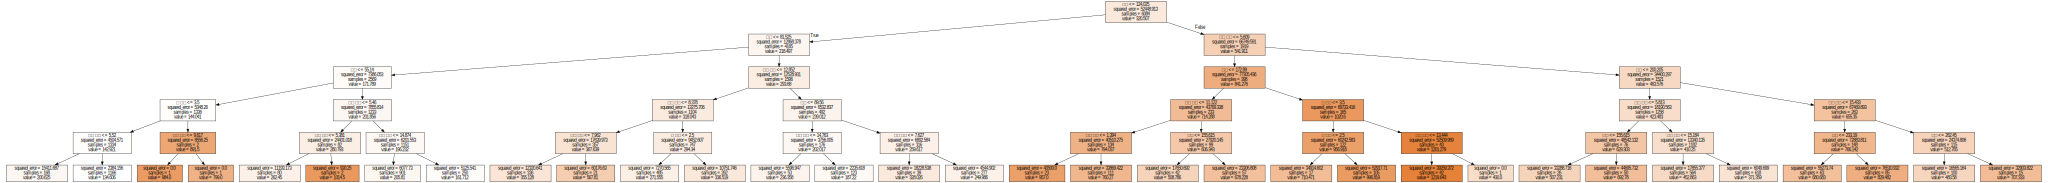

In [18]:
from sklearn.tree import export_graphviz
import graphviz

#파일생성
export_graphviz(DT_model_reg, out_file = "tree.dot", feature_names = feature_name, impurity = True, filled = True)

#파일열기

with open("tree.dot",encoding="utf-8") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

SVR

In [26]:
from pandas.core.common import random_state

X = df[['지하철 거리', '공항 거리', '병원 거리', '기차 거리', '면적','방 개수','집 종류']]
Y = np.log1p(df["월세 달러"])

#분포에 민감하게 반응
#accuracy가 마이너스로 나와서 로그를 씌워 정규분포화하여 진행


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

scaler = StandardScaler().fit(X_train, Y_train)
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

from sklearn.svm import SVR

SVR_model = SVR(C=1,kernel = "linear",epsilon=0.1)
SVR_model.fit(X_train,Y_train)
Y_pred = SVR_model.predict(X_test)

print("accuracy :{:.3f}".format(SVR_model.score(X_train,Y_train)))
rmse = sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE : {:.3f}".format(rmse))
print(SVR_model.coef_)

accuracy :0.693
RMSE : 0.685
[[ 0.01318007 -0.06228596 -0.0811787  -0.14812297  0.40256992  0.18696113
  -0.01284895]]


모형 성능비교

In [36]:
X1 = df[['지하철 거리', '공항 거리', '병원 거리', '기차 거리', '면적','방 개수','집 종류']]
Y1 = df["월세 달러"]

In [37]:
X1.columns

Index(['지하철 거리', '공항 거리', '병원 거리', '기차 거리', '면적', '방 개수', '집 종류'], dtype='object')

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size=0.3, random_state=0)

ct = ColumnTransformer([("scaling",StandardScaler(),['지하철 거리', '공항 거리', '병원 거리','기차 거리','면적']),
                        ("onehot", OneHotEncoder(sparse=False),['집 종류','방 개수'])])
ct.fit(X_train)
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [49]:
knn_model = KNeighborsRegressor(n_neighbors = 9)
dt_model_reg = DecisionTreeRegressor(random_state = 0, max_depth = 3)
svr_model = SVR(C=1,kernel = "linear",epsilon=0.1)

In [50]:
knn_model.fit(X_train, Y_train)
dt_model_reg.fit(X_train, Y_train)
svr_model.fit(X_train, Y_train)

SVR(C=1, kernel='linear')

In [52]:
knn_Y_pred = knn_model.predict(X_test)
dt_Y_pred = dt_model_reg.predict(X_test)
svr_Y_pred = svr_model.predict(X_test)

In [53]:
print("knn score : {:.3f}".format(knn_model.score(X_train, Y_train)))
print("dt score : {:.3f}".format(dt_model_reg.score(X_train, Y_train)))
print("svr score : {:.3f}".format(svr_model.score(X_train, Y_train)))

knn score : 0.837
dt score : 0.696
svr score : 0.648


KNN 모델이 월세달러와의 변수들의 상관관계를 가장 잘 설명한다